In [2]:
import networkx as nx 

phrases_with_labels = [
    ("Once upon a time, in a small village nestled at the edge of a vast, whispering forest, lived a curious boy named Leo.", "Plot Advancement"),
    ("He was ten years old, with wild, untamed hair and eyes that sparkled with the promise of adventure.", "Character Thought or Emotion"),
    ("Leo had heard countless tales about the whispering woods — stories of enchanted creatures, lost treasures, and secrets that the trees themselves would share if you listened closely enough.", "Abstract or Symbolic Description"),
    ("The villagers warned everyone, especially children, to stay away from the forest.", "Dialogue"),
    ("But Leo, with his unyielding curiosity, could not resist the allure of the unknown.", "Character Thought or Emotion"),
    ("Every evening, as the sun dipped below the horizon, Leo would sit on the steps of his house, gazing at the forest and imagining the wonders it held.", "Character Action"),
    ("One crisp autumn morning, when the village was still asleep, Leo decided to venture into the forest.", "Plot Advancement"),
    ("Quietly, he slipped out of his house and made his way towards the whispering woods.", "Character Action"),
    ("As soon as Leo stepped under the canopy of trees, he felt a shiver run down his spine.", "Character Thought or Emotion"),
    ("The air was cool, and the leaves rustled gently as if the forest was greeting him.", "Abstract or Symbolic Description"),
    ("He walked along a narrow path, listening carefully to the soft murmurs of the trees.", "Character Action"),
    ("The compass in his pocket pointed in all directions, spinning wildly, as if confused by the magic that surrounded them.", "Abstract or Symbolic Description"),
    ("Hours passed, and the deeper Leo went, the stranger things became.", "Plot Advancement"),
    ("He saw flowers that glowed in the shadows, streams that flowed upwards, and birds with feathers that shimmered like rainbows.", "Abstract or Symbolic Description"),
    ("The forest was alive, not just with animals, but with an energy that seemed to pulse from the very ground.", "Abstract Advancement"),
    ("Leo continued his journey, driven by a feeling that he was searching for something — though he wasn't sure what.", "Character Thought or Emotion"),
    ("Suddenly, he heard a distinct voice among the whispers.", "Plot Advancement"),
    ("It was faint but clear, calling his name: 'Leo… Leo…'", "Dialogue"),
    ("Leo followed the voice, weaving through the trees, until he came to a small clearing.", "Character Action"),
    ("In the center stood an ancient tree, larger and older than any he had ever seen.", "Abstract or Symbolic Description"),
    ("Its bark was silver, and its leaves glowed with a gentle, warm light.", "Abstract or Symbolic Description"),
    ("The tree seemed to breathe, and its branches swayed as if waving to Leo.", "Abstract Advancement"),
    ("'Who are you?' Leo asked, stepping closer.", "Dialogue"),
    ("The tree responded, its voice resonating through the clearing like the soft strumming of a harp.", "Abstract Advancement"),
    ("'I am the heart of this forest, young one.", "Dialogue"),
    ("I have watched over these woods for centuries, and I know all who enter.", "Dialogue"),
    ("You, Leo, are the first to truly listen.'", "Dialogue"),
    ("Leo felt a surge of pride.", "Character Thought or Emotion"),
    ("'What are you whispering about?' he asked.", "Dialogue"),
    ("The tree's leaves rustled, and Leo felt a gentle breeze wrap around him.", "Abstract Advancement"),
    ("'We whisper of the past, of those who came before you, of the magic that once filled every corner of the world.", "Dialogue"),
    ("But most importantly, we whisper of hope — the hope that someone like you will carry our stories beyond the forest's edge.'", "Dialogue"),
    ("Leo sat under the great tree, listening as it shared tales of ancient heroes, forgotten kingdoms, and the bond between humans and nature.", "Character Action"),
    ("He lost track of time, captivated by the stories that unfolded like dreams.", "Character Thought or Emotion"),
    ("The sun dipped low in the sky, casting golden light through the leaves.", "Abstract or Symbolic Description"),
    ("Eventually, the whispers softened, and the tree said, 'It is time for you to go, Leo.", "Dialogue"),
    ("But remember, the forest is always with you.", "Dialogue"),
    ("Carry our stories and share them with the world.'", "Dialogue"),
    ("Leo nodded, his heart full.", "Character Thought or Emotion"),
    ("He thanked the tree and promised to return one day.", "Character Action"),
    ("With that, he turned and retraced his steps, following the path back to his village.", "Character Action"),
    ("As he emerged from the forest, the whispers faded, but he could still feel their presence, like a comforting warmth in his chest.", "Abstract or Symbolic Description"),
    ("From that day on, Leo became the storyteller of his village.", "Narrative Insight"),
    ("Every evening, he would gather the children and share the tales of the whispering woods.", "Character Action"),
    ("He spoke of the enchanted creatures, the glowing flowers, and the ancient tree that knew all.", "Abstract or Symbolic Description"),
    ("And though the villagers still warned against the dangers of the forest, they could not deny the magic in Leo's stories.", "Narrative Insight"),
    ("Years passed, and Leo grew up, but he never forgot his promise.", "Narrative Insight"),
    ("He continued to share the whispers of the woods, ensuring that the magic of the forest lived on in every story he told.", "Narrative Insight"),
    ("And in every corner of the world, wherever Leo's tales were heard, the whispering woods were never truly silent again.", "Narrative Insight")
]


In [5]:
import numpy as np



def create_transition_matrix(transitions, states):
    """
    Creates a transition probability matrix based on the given transitions between states.

    Parameters:
    - transitions: A list of tuples representing transitions between states (from_state, to_state).
    - states: A list of all unique states.

    Returns:
    - A NumPy array representing the transition probability matrix.
    """
    # Create a mapping from states to indices
    state_index = {state: i for i, state in enumerate(states)}
    num_states = len(states)
    
    # Initialize the transition count matrix
    transition_counts = np.zeros((num_states, num_states))
    
    # Count the transitions
    for (from_state, to_state) in transitions:
        from_index = state_index[from_state]
        to_index = state_index[to_state]
        transition_counts[from_index, to_index] += 1
    
    # Convert counts to probabilities
    transition_matrix = np.zeros((num_states, num_states))
    for i in range(num_states):
        total_transitions = np.sum(transition_counts[i])
        if total_transitions > 0:
            transition_matrix[i] = transition_counts[i] / total_transitions

    return transition_matrix

states = list(set([e[1] for e in phrases_with_labels]))
sequence_labels = [e[1] for e in phrases_with_labels]
transitions = [(sequence_labels[i] , sequence_labels[i+1]) for i in range(len(sequence_labels) - 1 )]

transition_matrix = create_transition_matrix(transitions, states)



[[0.11111111 0.11111111 0.11111111 0.22222222 0.22222222 0.22222222
  0.        ]
 [0.5        0.125      0.125      0.         0.         0.
  0.25      ]
 [0.25       0.25       0.         0.         0.         0.25
  0.25      ]
 [0.         0.25       0.         0.75       0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.75
  0.25      ]
 [0.         0.16666667 0.         0.         0.16666667 0.41666667
  0.25      ]
 [0.42857143 0.28571429 0.14285714 0.         0.         0.14285714
  0.        ]]


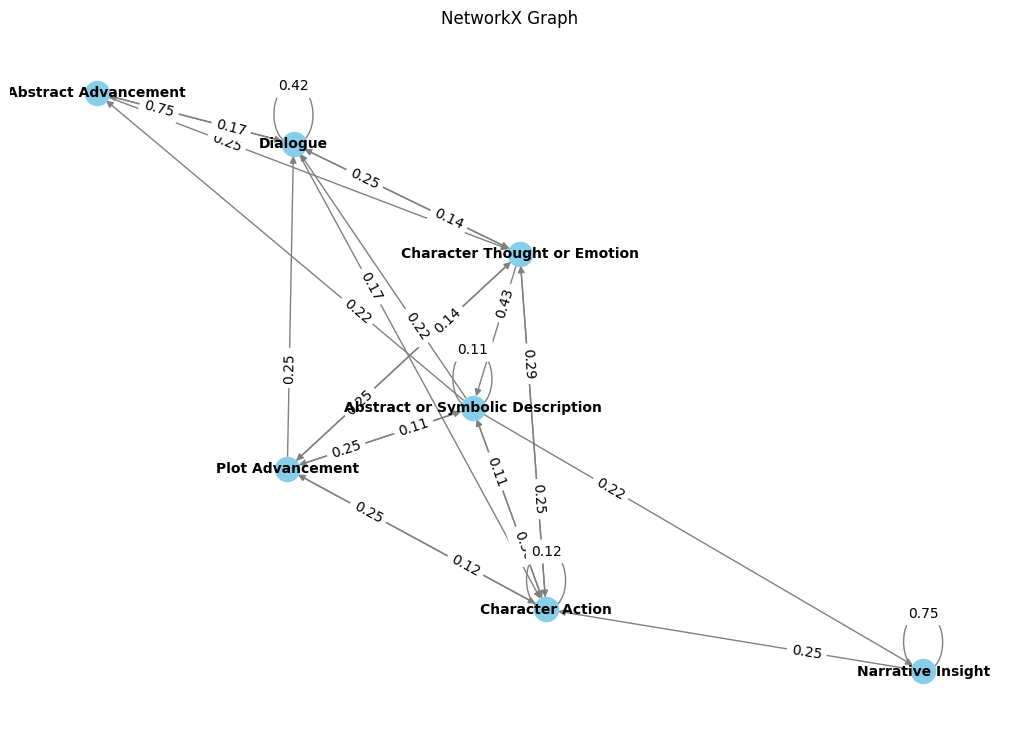

In [43]:
import networkx as nx
import matplotlib.pyplot as plt 
def plot_networkx_graph(G: nx.DiGraph, title: str = "NetworkX Graph", node_size: int = 300, font_size: int = 10) -> None:
    """
    Plots a NetworkX directed graph with edge labels showing transition probabilities using Matplotlib.

    Args:
        G (nx.DiGraph): The NetworkX directed graph to plot.
        title (str, optional): Title of the graph plot. Defaults to "NetworkX Graph".
        node_size (int, optional): Size of the nodes in the plot. Defaults to 300.
        font_size (int, optional): Font size of the node labels. Defaults to 10.

    Returns:
        None
    """
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G)  # Positions the nodes using the spring layout algorithm

    # Draw nodes, edges, and labels
    nx.draw(
        G, pos, with_labels=True, node_size=node_size, font_size=font_size,
        node_color='skyblue', edge_color='gray', font_weight='bold', arrows=True
    )

    # Extract edge labels (probabilities) from the graph's edge attributes
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}

    # Draw the edge labels on the graph
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=font_size, label_pos=0.3)

    plt.title(title)
    plt.show()
def create_markov_chain(transition_matrix, states):
    """
    Creates a Markov chain as a directed graph from the transition probability matrix.

    Parameters:
    - transition_matrix: A 2D NumPy array representing the transition probabilities between states.
    - states: A list of states corresponding to the indices of the matrix.

    Returns:
    - A NetworkX DiGraph object representing the Markov chain.
    """
    # Initialize a directed graph
    markov_chain = nx.DiGraph()

    # Add nodes
    markov_chain.add_nodes_from(states)

    # Add edges with weights based on the transition matrix
    num_states = len(states)
    for i in range(num_states):
        for j in range(num_states):
            probability = transition_matrix[i, j]
            if probability > 0:  # Only add edges with a positive probability
                markov_chain.add_edge(states[i], states[j], weight=probability)

    return markov_chain



# Create Markov Chain
markov_chain = create_markov_chain(transition_matrix , states)
plot_networkx_graph(markov_chain)


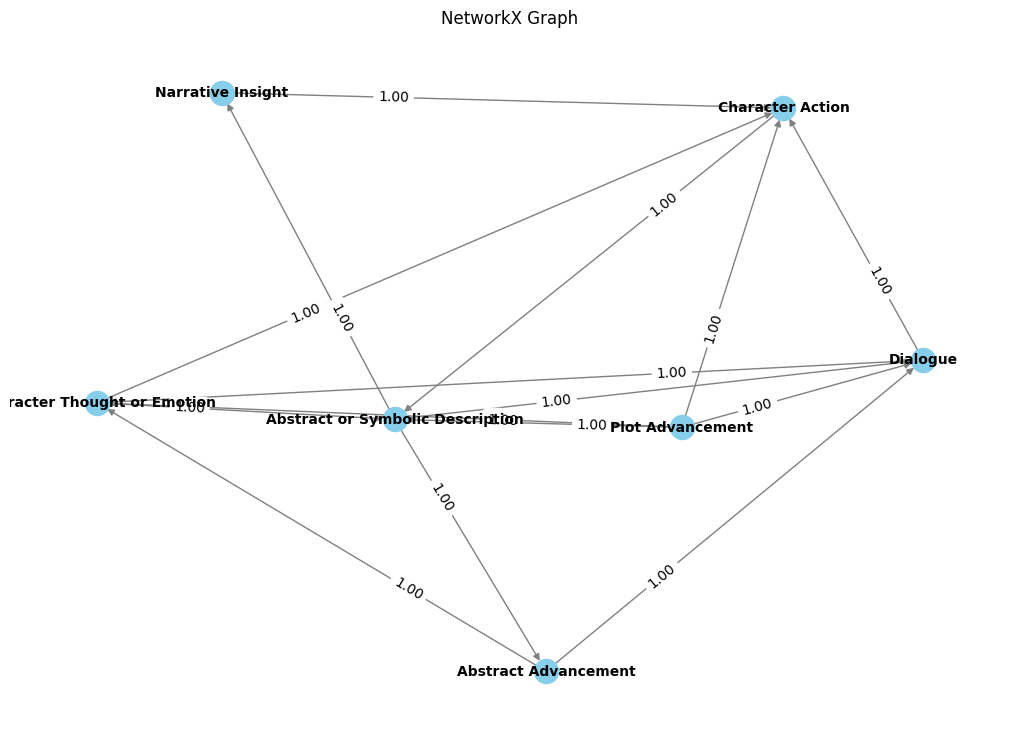

In [41]:




def find_order_sequence(graph_or : nx.DiGraph) : 
    graph = graph_or.copy()
# Iterate through all pairs of nodes
    for node1 in graph.nodes:
        for node2 in graph.nodes:
            if node1 != node2:  # Skip self-loops if not needed
                # Extract the weight from node1 to node2, if the edge exists
                weight1 = graph.get_edge_data(node1, node2, {}).get('weight', None)
                
                # Extract the weight from node2 to node1, if the edge exists
                weight2 = graph.get_edge_data(node2, node1, {}).get('weight', None)
                
                # Check and remove the existing edges if they exist
                if graph.has_edge(node1, node2):
                    graph.remove_edge(node1, node2)
                if graph.has_edge(node2, node1):
                    graph.remove_edge(node2, node1)

                # Compare weights only if both weights are not None
                if weight1 is not None and weight2 is not None:
                    if weight1 > weight2:
                        graph.add_edge(node1, node2, weight=1)
                    else:
                        graph.add_edge(node2, node1, weight=1)
                elif weight1 is not None:  # If only weight1 exists
                    graph.add_edge(node1, node2, weight=1)
                elif weight2 is not None:  # If only weight2 exists
                    graph.add_edge(node2, node1, weight=1)
            elif graph.has_edge(node1, node1) : 
                graph.remove_edge(node1 , node1)
    return graph 

graph = find_order_sequence(markov_chain)
plot_networkx_graph(graph)

                        
        

    

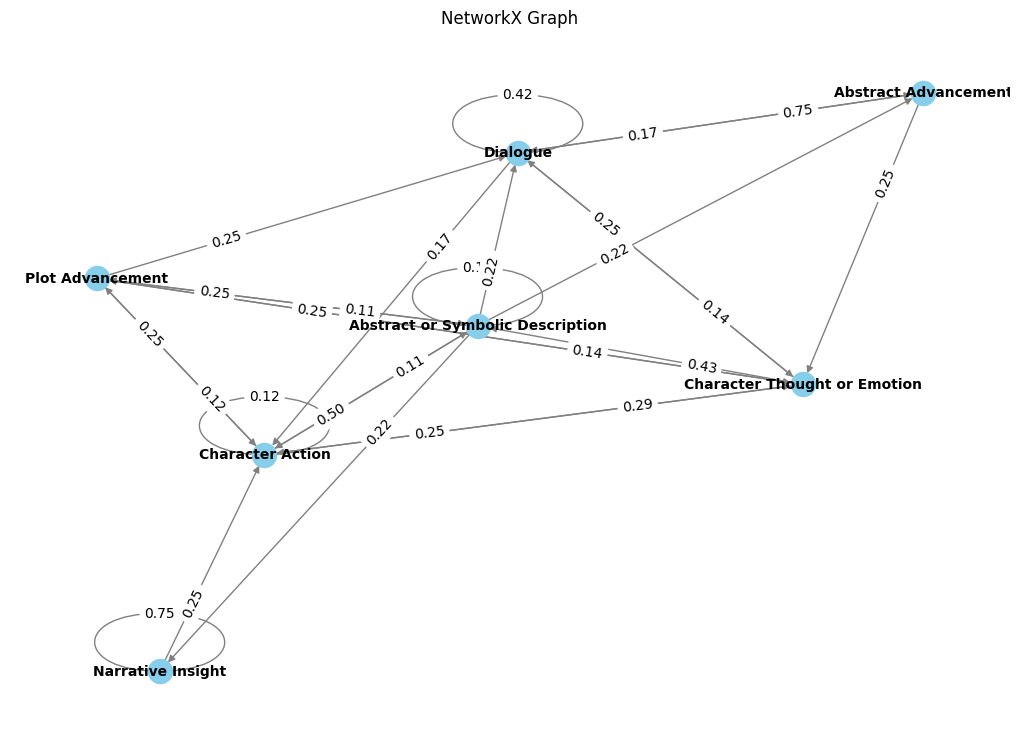

Most Probable Path of Length 7: ['Narrative Insight', 'Character Action', 'Abstract or Symbolic Description', 'Abstract Advancement', 'Dialogue', 'Character Thought or Emotion', 'Plot Advancement']
Probability of the Path: 0.000744047619047619


In [56]:
import networkx as nx
import numpy as np


def find_most_probable_path_of_length_n(graph, n):
    """
    Finds the most probable path of length n in a graph.

    Parameters:
    - graph: A NetworkX directed graph with 'weight' as edge probability.
    - n: The desired length of the path in terms of number of nodes.

    Returns:
    - best_path: The most probable path as a list of nodes.
    - best_probability: The overall probability of the most probable path.
    """
    def dfs(current_node, path, probability):
        nonlocal best_path, best_probability

        if len(path) == n:
            if probability > best_probability:
                best_probability = probability
                best_path = path[:]
            return

        for neighbor in graph.successors(current_node):
            if neighbor not in path: 
                edge_weight = graph.get_edge_data(current_node, neighbor, {}).get('weight', 0)
                if edge_weight > 0:
                    dfs(neighbor, path + [neighbor], probability * edge_weight)

    best_path = []
    best_probability = 0

    for node in graph.nodes:
        dfs(node, [node], 1)

    return best_path, best_probability




markov_chain = create_markov_chain(transition_matrix , states)
plot_networkx_graph(markov_chain)
n = len(states)
most_probable_path, probability = find_most_probable_path_of_length_n(markov_chain, n=n)
print(f"Most Probable Path of Length {n}:", most_probable_path)
print("Probability of the Path:", probability)
